In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from Pytorch_dataset import DimReduction_dataset
from utils import RMSELoss, pred_inverse_transform
from torchmetrics.functional import mean_absolute_percentage_error

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('cuda is available')

def model_evaluate(eol_model, batch_size=32, model_num=0, norm=True):
    # load train data
    eol_train_dataset = DimReduction_dataset(train=True, pred_target='EOL', norm=True)
    eol_train_loader = DataLoader(eol_train_dataset, batch_size=batch_size, shuffle=False)

    # load test data
    eol_test_dataset = DimReduction_dataset(train=False, pred_target='EOL', norm=True)
    eol_test_loader = DataLoader(eol_test_dataset, batch_size=batch_size, shuffle=False)

    # RMSE
    rmse = RMSELoss()

    eol_model = eol_model.to(device)
    train_rmse_lst = []
    test_rmse_lst = []
    train_mape_lst = []
    test_mape_lst = []
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(eol_train_loader):
            inputs = inputs.to(device)
            targets = targets
            outputs = eol_model(inputs)
            if norm:
                outputs = pred_inverse_transform(outputs.cpu(), train=True).cuda()
                targets = pred_inverse_transform(targets, train=True)

            mape_train = mean_absolute_percentage_error(outputs, targets.view(-1, 1).cuda())
            rmse_train = rmse(outputs, targets.view(-1, 1).cuda())
            
            train_rmse_lst.append(rmse_train.item())
            train_mape_lst.append(mape_train.item())
            if i == 0:
                plt.plot(outputs.cpu(), targets, 'ro', markersize=2.5, label='train')
            else:
                plt.plot(outputs.cpu(), targets, 'ro', markersize=2.5)
        print(f'Training set|RMSE: {np.average(train_rmse_lst):.2f}, MAPE: {np.average(train_mape_lst):.2f}')

        for i, (inputs, targets) in enumerate(eol_test_loader):
            inputs = inputs.to(device)
            targets = targets
            outputs = eol_model(inputs)
            if norm:
                outputs = pred_inverse_transform(outputs.cpu(), train=False).cuda()
                targets = pred_inverse_transform(targets, train=True)
            
            mape_test = mean_absolute_percentage_error(outputs, targets.view(-1, 1).cuda())
            rmse_test = rmse(outputs, targets.view(-1, 1).cuda())
            
            test_rmse_lst.append(rmse_test.item())
            test_mape_lst.append(mape_test.item())
            # plot
            if i == 0:
                plt.plot(outputs.cpu(), targets, 'bo', markersize=2.5, label='valid')
            else:
                plt.plot(outputs.cpu(), targets, 'bo', markersize=2.5)
        print(f'Testing set|RMSE: {np.average(test_rmse_lst):.2f}, MAPE: {np.average(test_mape_lst):.2f}')
        
        plt.title('EOL model_'+str(model_num))
        plt.plot([0,2000], [0,2000], 'k--', linewidth=1.0)
        plt.xlabel('predicted')
        plt.ylabel('ground truth')
        plt.legend()
        plt.savefig('Figures/eol_model'+str(model_num)+'.jpg')



cuda is available


# New

Training set|RMSE: 167.26, MAPE: 0.19
Testing set|RMSE: 172.22, MAPE: 0.19


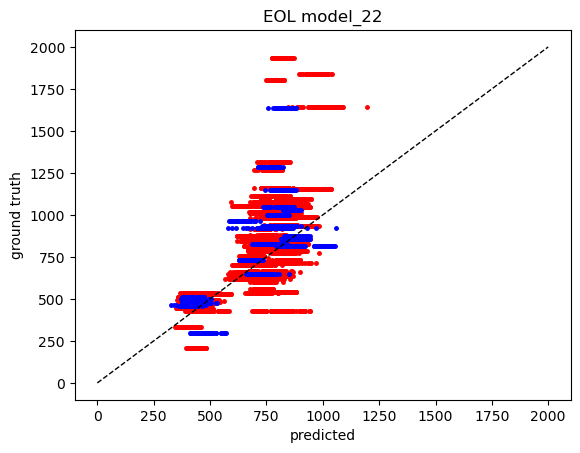

In [2]:
batch_size = 32
FILE = 'Model/eol_model_new_1.pth'
eol_model = torch.load(FILE)
eol_model.eval()
model_evaluate(eol_model, batch_size=batch_size, model_num=22)

## norm=True

Training set|RMSE: 88.63, MAPE: 0.11
Testing set|RMSE: 162.07, MAPE: 0.21


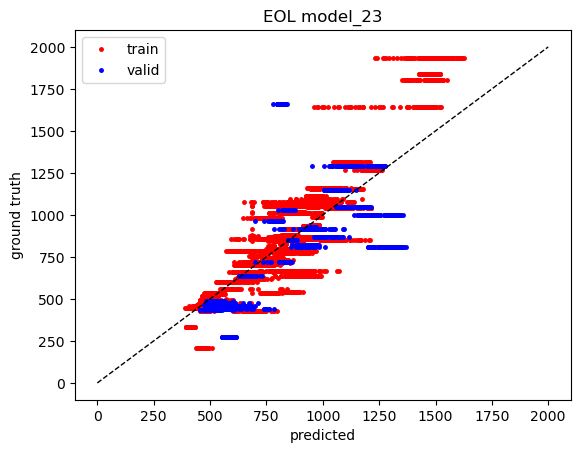

In [14]:
batch_size = 32
FILE = 'Model/eol_model_new_2.pth'
eol_model = torch.load(FILE)
eol_model.eval()
model_evaluate(eol_model, batch_size=batch_size, model_num=23, norm=True)

# Old

Training set|RMSE: 564.31, MAPE: 0.95
Testing set|RMSE: 546.39, MAPE: 0.94


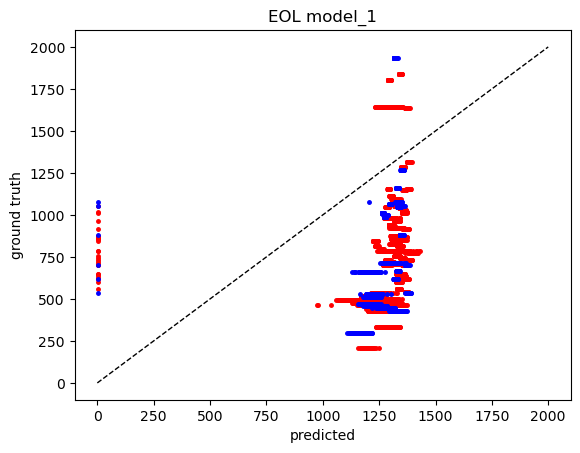

In [2]:
batch_size = 32

# load model
"""
num_epochs = 500
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model1.pth'
eol_model1 = torch.load(FILE)
eol_model1.eval()
model_evaluate(eol_model1, batch_size=batch_size, model_num=1)

Training set|RMSE: 352.54, MAPE: 0.39
Testing set|RMSE: 396.74, MAPE: 0.40


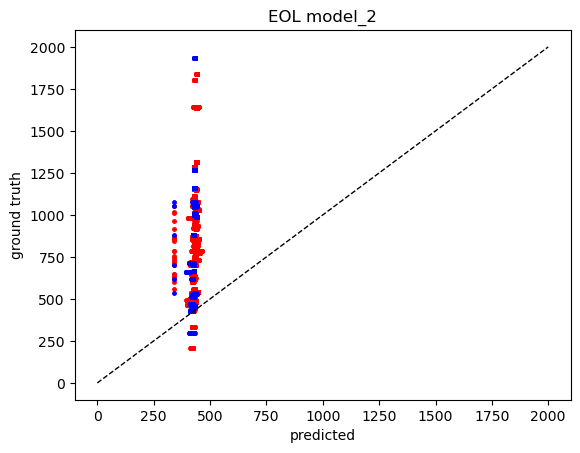

In [3]:
"""
num_epochs = 250
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model2.pth'
eol_model2 = torch.load(FILE)
eol_model2.eval()
model_evaluate(eol_model2, batch_size=batch_size, model_num=2)

Training set|RMSE: 251.89, MAPE: 0.30
Testing set|RMSE: 303.39, MAPE: 0.33


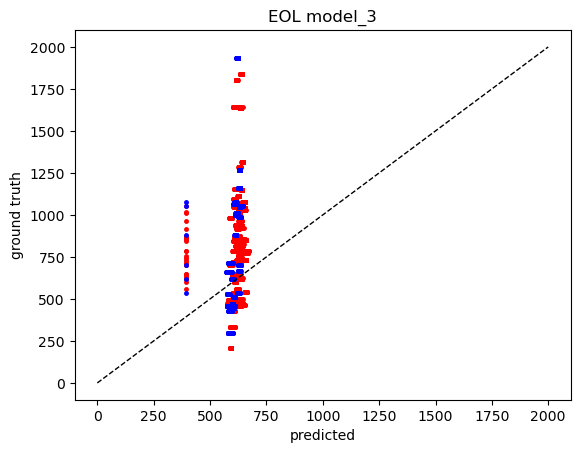

In [4]:
"""
num_epochs = 50
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model3.pth'
eol_model3 = torch.load(FILE)
eol_model3.eval()
model_evaluate(eol_model3, batch_size=batch_size, model_num=3)

Training set|RMSE: 667.42, MAPE: 1.13
Testing set|RMSE: 635.01, MAPE: 1.10


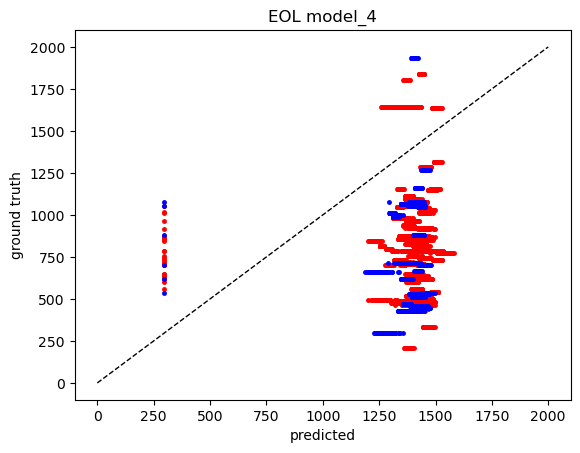

In [5]:
"""
num_epochs = 25
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model4.pth'
eol_model4 = torch.load(FILE)
eol_model4.eval()
model_evaluate(eol_model4, batch_size=batch_size, model_num=4)

Training set|RMSE: 416.41, MAPE: 0.47
Testing set|RMSE: 457.34, MAPE: 0.48


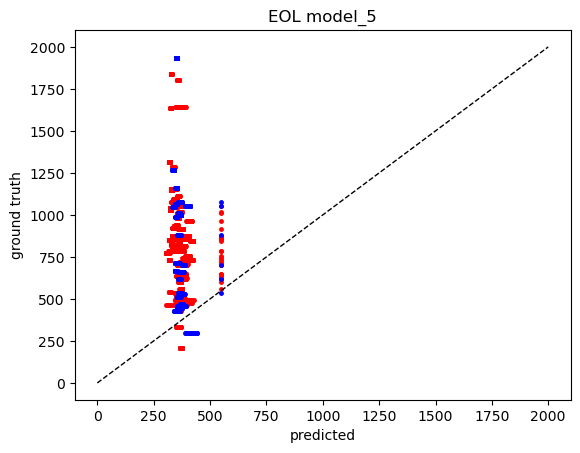

In [6]:
"""
num_epochs = 50
batch_size = 32
lr = 1e-2
weight_decay = 1e-3
cosine_period = 5
min_lr = 1e-5
delta_huber = 1
"""
FILE = 'Model/eol_model5.pth'
eol_model5 = torch.load(FILE)
eol_model5.eval()
model_evaluate(eol_model5, batch_size=batch_size, model_num=5)

Training set|RMSE: 1583.00, MAPE: 2.49
Testing set|RMSE: 1485.63, MAPE: 2.39


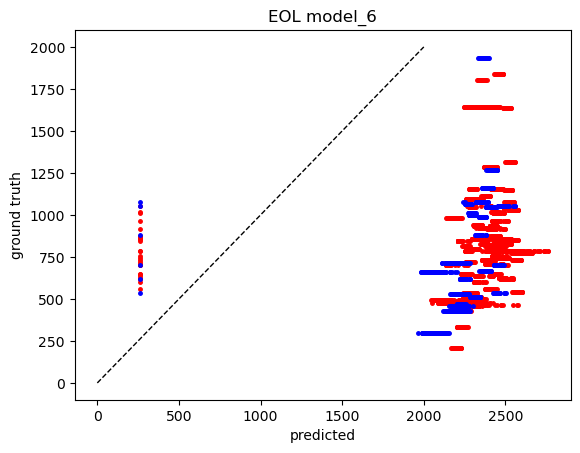

In [7]:
FILE = 'Model/eol_model6.pth'
eol_model6 = torch.load(FILE)
eol_model6.eval()
model_evaluate(eol_model6, batch_size=batch_size, model_num=6)

Training set|RMSE: 286.52, MAPE: 0.33
Testing set|RMSE: 339.61, MAPE: 0.36


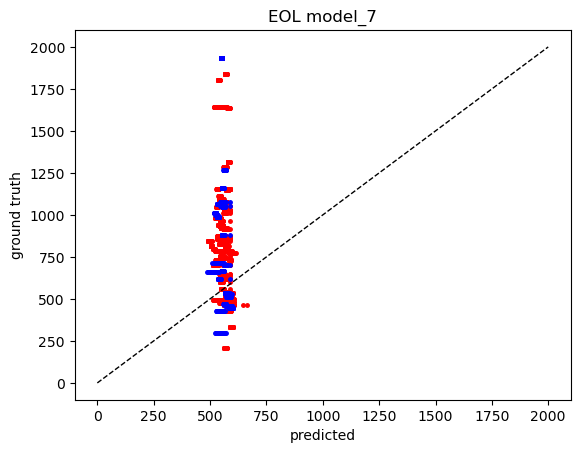

In [8]:
FILE = 'Model/eol_model7.pth'
eol_model7 = torch.load(FILE)
eol_model7.eval()
model_evaluate(eol_model7, batch_size=batch_size, model_num=7)

Training set|RMSE: 142.23, MAPE: 0.18
Testing set|RMSE: 173.21, MAPE: 0.22


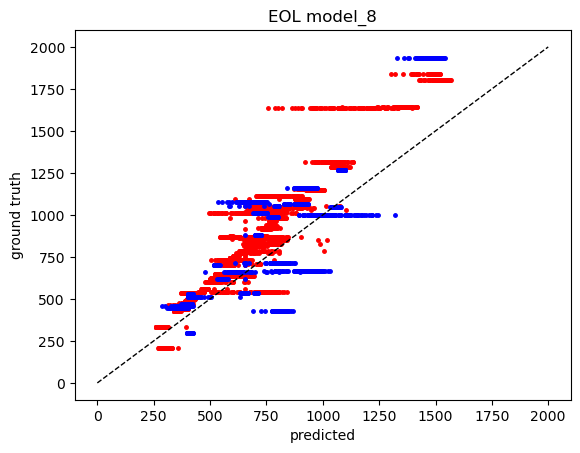

In [9]:
FILE = 'Model/eol_model8.pth'
eol_model8 = torch.load(FILE)
eol_model8.eval()
model_evaluate(eol_model8, batch_size=batch_size, model_num=8)

Training set|RMSE: 150.61, MAPE: 0.19
Testing set|RMSE: 182.59, MAPE: 0.24


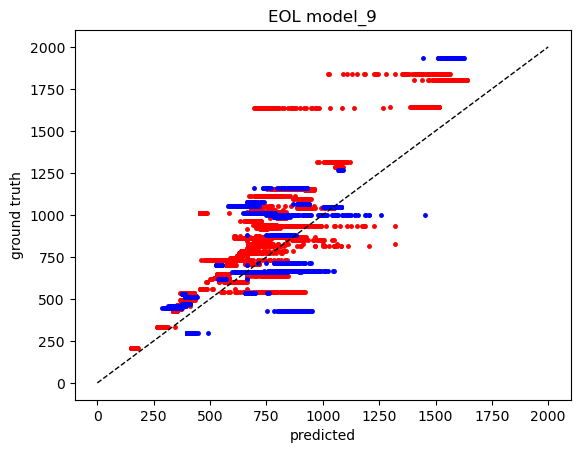

In [10]:
FILE = 'Model/eol_model9.pth'
eol_model9 = torch.load(FILE)
eol_model9.eval()
model_evaluate(eol_model9, batch_size=batch_size, model_num=9)

Training set|RMSE: 141.00, MAPE: 0.17
Testing set|RMSE: 169.03, MAPE: 0.21


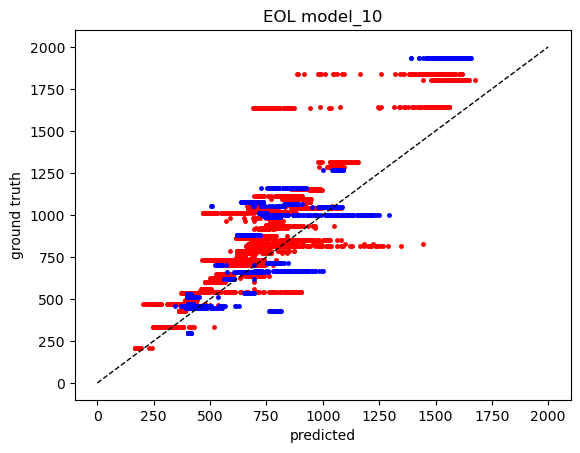

In [11]:
FILE = 'Model/eol_model10.pth'
eol_model10 = torch.load(FILE)
eol_model10.eval()
model_evaluate(eol_model10, batch_size=batch_size, model_num=10)

Training set|RMSE: 112.93, MAPE: 0.14
Testing set|RMSE: 174.93, MAPE: 0.23


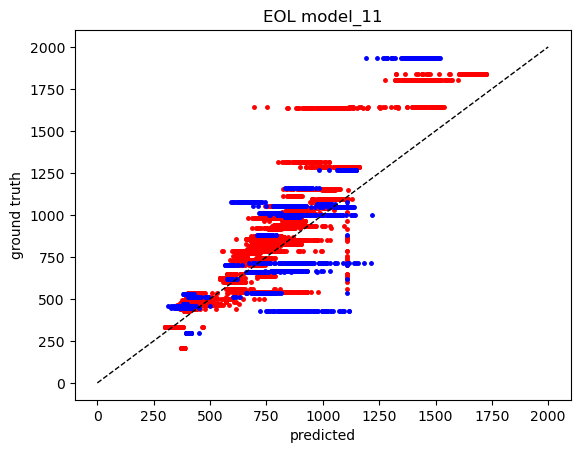

In [12]:
FILE = 'Model/eol_model11.pth'
eol_model11 = torch.load(FILE)
eol_model11.eval()
model_evaluate(eol_model11, batch_size=batch_size, model_num=11)

Training set|RMSE: 129.47, MAPE: 0.15
Testing set|RMSE: 175.53, MAPE: 0.21


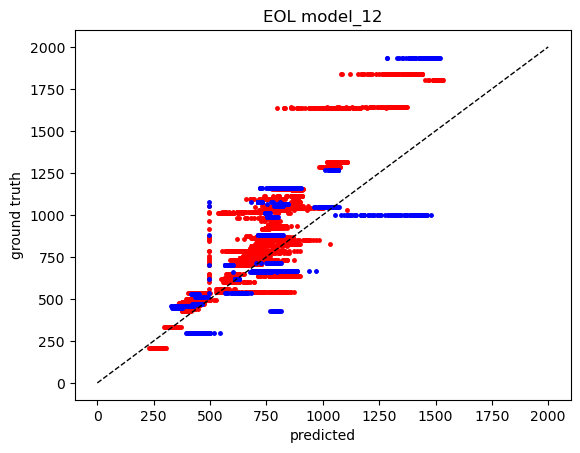

In [13]:
FILE = 'Model/eol_model12.pth'
eol_model12 = torch.load(FILE)
eol_model12.eval()
model_evaluate(eol_model12, batch_size=32, model_num=12)

Training set|RMSE: 122.60, MAPE: 0.16
Testing set|RMSE: 176.70, MAPE: 0.23


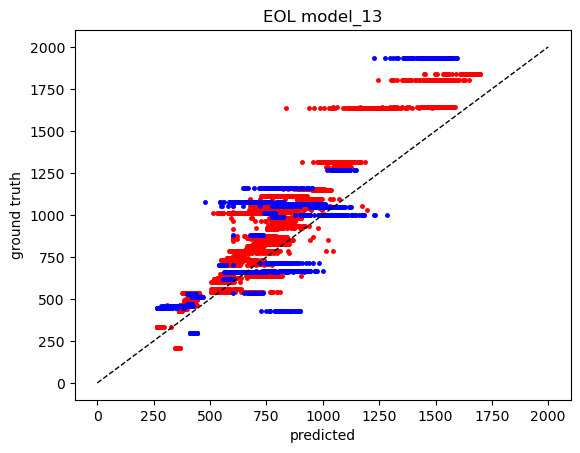

In [14]:
FILE = 'Model/eol_model13.pth'
eol_model13 = torch.load(FILE)
eol_model13.eval()
model_evaluate(eol_model13, batch_size=32, model_num=13)

Training set|RMSE: 142.71, MAPE: 0.15
Testing set|RMSE: 215.90, MAPE: 0.23


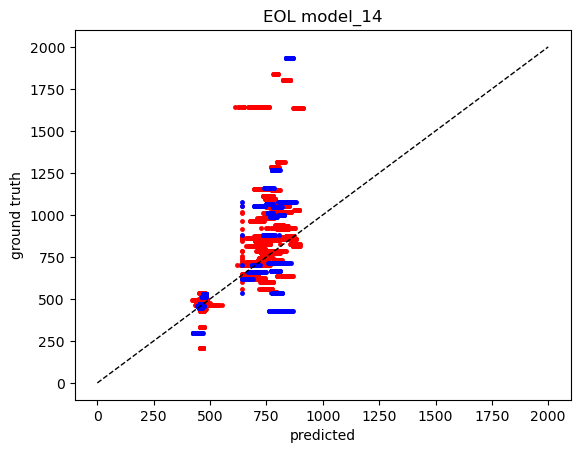

In [15]:
FILE = 'Model/eol_model14.pth'
eol_model14 = torch.load(FILE)
eol_model14.eval()
model_evaluate(eol_model14, batch_size=32, model_num=14)

Training set|RMSE: 136.45, MAPE: 0.15
Testing set|RMSE: 187.93, MAPE: 0.22


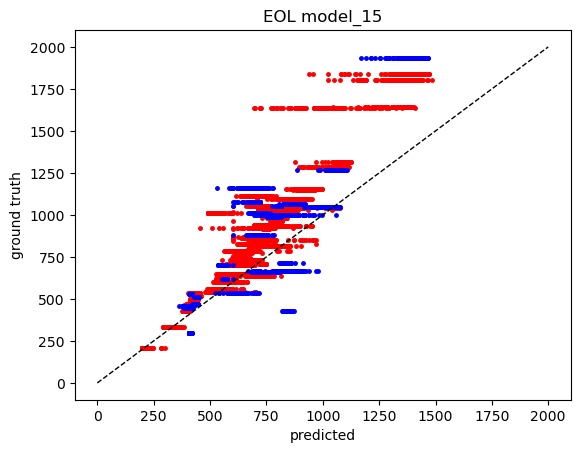

In [16]:
FILE = 'Model/eol_model15.pth'
eol_model15 = torch.load(FILE)
eol_model15.eval()
model_evaluate(eol_model15, batch_size=32, model_num=15)

Training set|RMSE: 133.32, MAPE: 0.16
Testing set|RMSE: 175.14, MAPE: 0.22


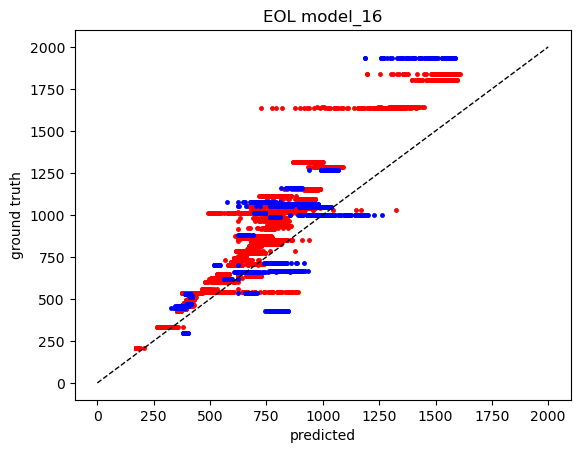

In [17]:
FILE = 'Model/eol_model16.pth'
eol_model16 = torch.load(FILE)
eol_model16.eval()
model_evaluate(eol_model16, batch_size=32, model_num=16)

Training set|RMSE: 130.50, MAPE: 0.16
Testing set|RMSE: 174.68, MAPE: 0.22


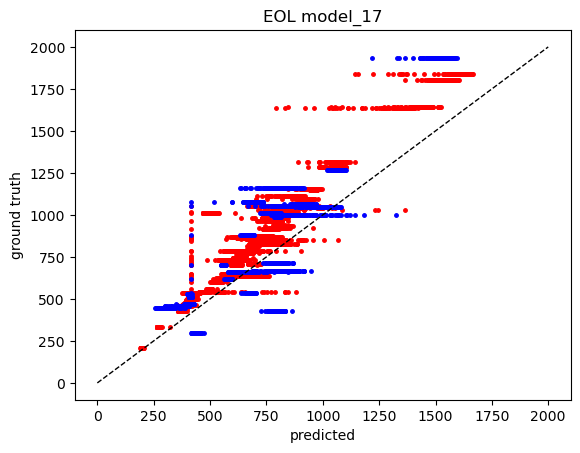

In [19]:
FILE = 'Model/eol_model17.pth'
eol_model17 = torch.load(FILE)
eol_model17.eval()
model_evaluate(eol_model17, batch_size=32, model_num=17)

Training set|RMSE: 115.86, MAPE: 0.13
Testing set|RMSE: 173.08, MAPE: 0.22


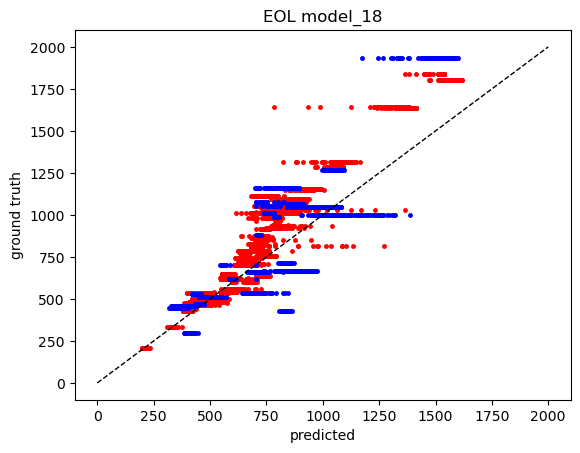

In [20]:
FILE = 'Model/eol_model18.pth'
eol_model18 = torch.load(FILE)
eol_model18.eval()
model_evaluate(eol_model18, batch_size=32, model_num=18)

Training set|RMSE: 125.95, MAPE: 0.15
Testing set|RMSE: 174.62, MAPE: 0.21


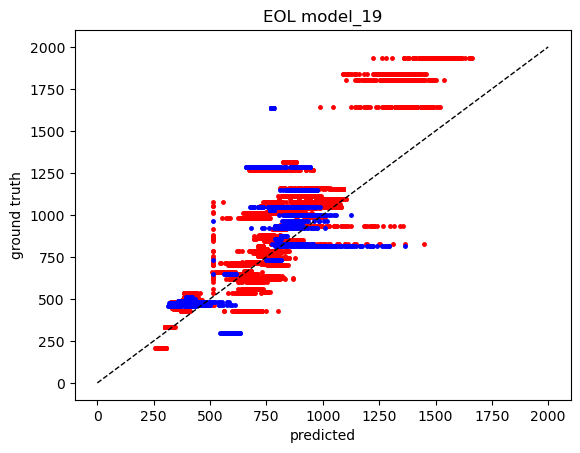

In [5]:
FILE = 'Model/eol_model19.pth'
eol_model19 = torch.load(FILE)
eol_model19.eval()
model_evaluate(eol_model19, batch_size=32, model_num=19)

Training set|RMSE: 158.74, MAPE: 0.18
Testing set|RMSE: 146.18, MAPE: 0.18


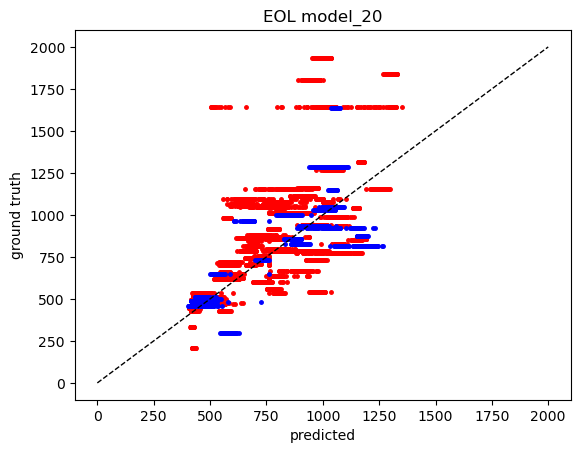

In [6]:
FILE = 'Model/eol_model20.pth'
eol_model20 = torch.load(FILE)
eol_model20.eval()
model_evaluate(eol_model20, batch_size=32, model_num=20)

Training set|RMSE: 160.23, MAPE: 0.19
Testing set|RMSE: 143.57, MAPE: 0.15


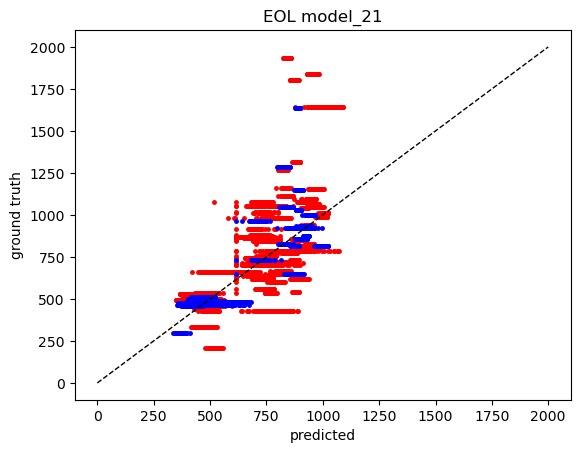

In [7]:
FILE = 'Model/eol_model21.pth'
eol_model21 = torch.load(FILE)
eol_model21.eval()
model_evaluate(eol_model21, batch_size=32, model_num=21)